<a href="https://colab.research.google.com/github/runtorain/stock_prediction/blob/main/Stock_Forecasting_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Referance https://www.ultimatepython.co/post/python-yahoo-finance

In [ ]:
#Set50 List
#https://www.settrade.com/th/equities/market-data/overview?category=Index&index=SET50

**List of SET 50 Symbol**

ADVANC
AOT
AWC
BANPU
BBL
BDMS
BEM
BGRIM
BH
BTS
CBG
CENTEL
COM7
CPALL
CPF
CPN
CRC
DELTA
DTAC
EA
EGCO
GLOBAL
GPSC
GULF
HMPRO
INTUCH
IVL
JMART
JMT
KBANK
KTB
KTC
**LH**
MINT
MTC
OR
OSP
PTT
PTTEP
PTTGC
RATCH
SAWAD
SCB
SCC
SCGP
TIDLOR
TISCO
TOP
TRUE
TRUEE
TTB
TU


In [ ]:
import yfinance as yf

In [ ]:
#Sample pick up only LH
lh = yf.Ticker('lh.bk')

In [ ]:
##Input your desider date
interval = '1d'
start = '2002-1-1'
end = '2023-09-01'

In [ ]:
lh_price_df = lh.history(interval='1d',start=start,end=end)
lh_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-01-01 00:00:00+07:00,0.782325,0.782325,0.782325,0.782325,0,0.0,0.0
2002-01-02 00:00:00+07:00,0.782325,0.798372,0.778313,0.788342,15307200,0.0,0.0
2002-01-03 00:00:00+07:00,0.792354,0.836485,0.792354,0.798372,19868400,0.0,0.0
2002-01-04 00:00:00+07:00,0.812414,0.828461,0.792354,0.808402,19299600,0.0,0.0
2002-01-07 00:00:00+07:00,0.822444,0.822444,0.792354,0.802384,7213200,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-25 00:00:00+07:00,8.250000,8.300000,8.200000,8.300000,44743200,0.0,0.0
2023-08-28 00:00:00+07:00,8.300000,8.350000,8.250000,8.350000,25917700,0.0,0.0
2023-08-29 00:00:00+07:00,8.400000,8.400000,8.300000,8.350000,58845200,0.0,0.0


In [ ]:
lh_price_df.index = lh_price_df.index.strftime('%Y-%m-%d')

In [ ]:
lh_price_df.index

Index(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04', '2002-01-07',
       '2002-01-08', '2002-01-09', '2002-01-10', '2002-01-11', '2002-01-14',
       ...
       '2023-08-18', '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
       '2023-08-25', '2023-08-28', '2023-08-29', '2023-08-30', '2023-08-31'],
      dtype='object', name='Date', length=5355)

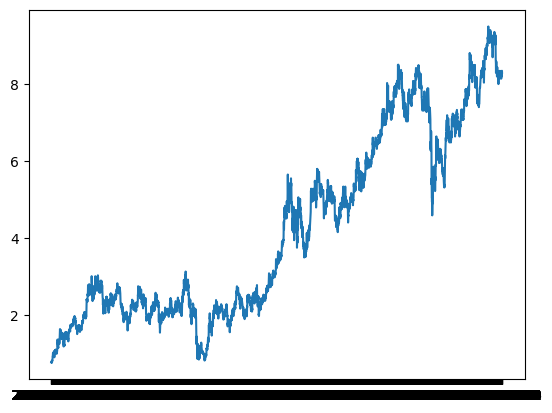

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lh_price_df.index, lh_price_df['Close'])

In [ ]:
df = lh_price_df[['Close']].copy()

In [ ]:
df

,Close
Date,
2002-01-01,0.782325
2002-01-02,0.788342
2002-01-03,0.798372
2002-01-04,0.808402
2002-01-07,0.802384
...,...
2023-08-25,8.300000
2023-08-28,8.350000
2023-08-29,8.350000


In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df.index = df.index.map(str_to_datetime)
df.index

DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-07', '2002-01-08', '2002-01-09', '2002-01-10',
               '2002-01-11', '2002-01-14',
               ...
               '2023-08-18', '2023-08-21', '2023-08-22', '2023-08-23',
               '2023-08-24', '2023-08-25', '2023-08-28', '2023-08-29',
               '2023-08-30', '2023-08-31'],
              dtype='datetime64[ns]', name='Date', length=5355, freq=None)

In [ ]:
import numpy as np
import pandas as pd

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-09-5',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,7.113751,7.155352,7.113751,7.196951
1,2021-03-26,7.155352,7.113751,7.196951,7.196951
2,2021-03-29,7.113751,7.196951,7.196951,7.238553
3,2021-03-30,7.196951,7.196951,7.238553,7.196951
4,2021-03-31,7.196951,7.238553,7.196951,7.113751
...,...,...,...,...,...
342,2022-08-30,8.277282,8.183222,8.183222,8.324312
343,2022-08-31,8.183222,8.183222,8.324312,8.371341
344,2022-09-01,8.183222,8.324312,8.371341,8.183222
345,2022-09-02,8.324312,8.371341,8.183222,8.230252


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((347,), (347, 3, 1), (347,))

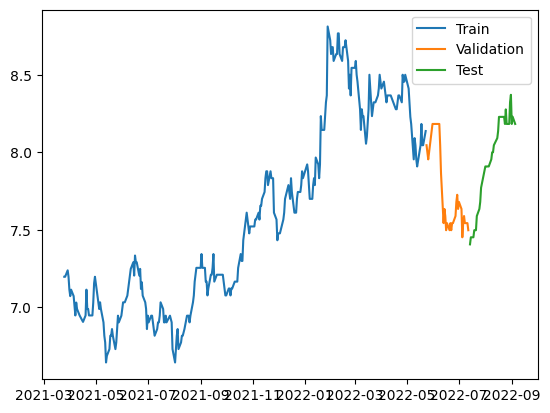

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
9/9 [==============================] - 2s 52ms/step - loss: 57.9751 - mean_absolute_error: 7.5890 - val_loss: 55.7034 - val_mean_absolute_error: 7.4590
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 50.1134 - mean_absolute_error: 7.0518 - val_loss: 47.9077 - val_mean_absolute_error: 6.9168
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 41.5347 - mean_absolute_error: 6.4158 - val_loss: 37.2431 - val_mean_absolute_error: 6.0976
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 29.7915 - mean_absolute_error: 5.4201 - val_loss: 23.1374 - val_mean_absolute_error: 4.8040
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 15.5769 - mean_absolute_error: 3.8679 - val_loss: 8.1667 - val_mean_absolute_error: 2.8481
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 3.4883 - mean_absolute_error: 1.6720 - val_loss: 0.2284 - val_mean_absolute_error: 0.4210
Epoch 7/100
9/9 [=======

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,065
Trainable params: 20,065
Non-trainable params: 0
_________________________________________________________________


9/9 [==============================] - 0s 1ms/step


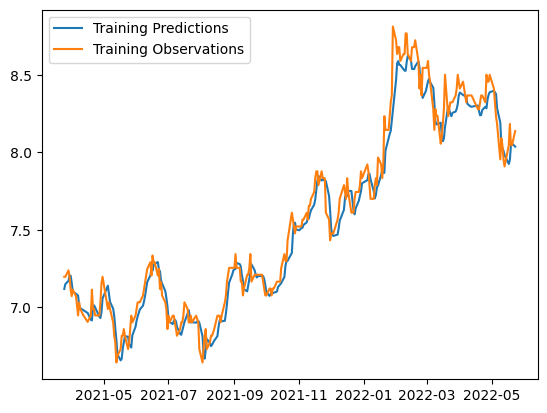

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 4ms/step


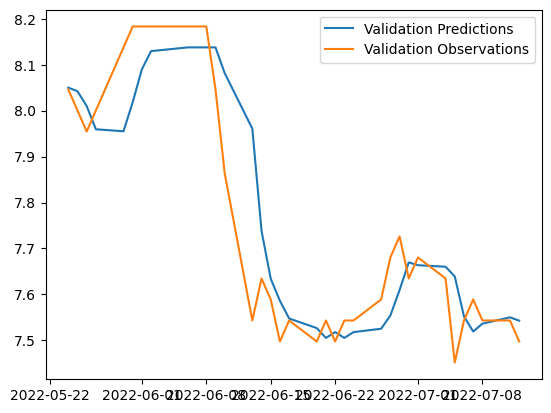

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


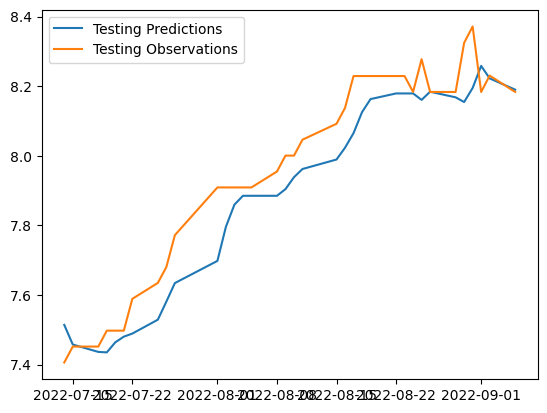

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

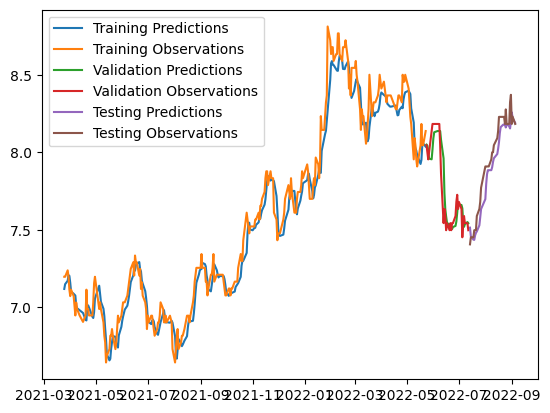

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 15ms/step


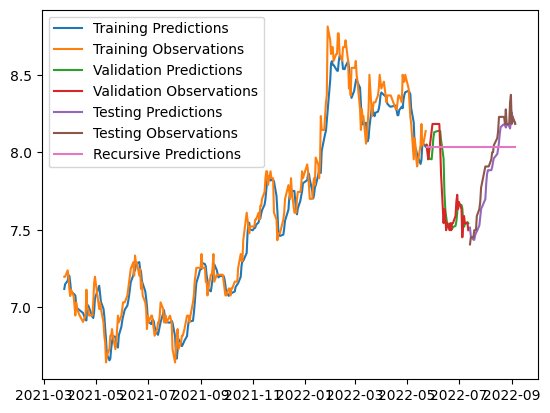

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])